<a href="https://colab.research.google.com/github/tanishq252/AI-ML-DS-Learning-Series/blob/main/Random_Forest_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Dataset and libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataSet = pd.read_csv("Position_Salaries.csv")
dataSet

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [ ]:
x = dataSet.iloc[:,1:-1].values
y = dataSet.iloc[:,-1].values

#Training the dataset with Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# more the number of n_estimators better the accuracy
# more time complexity tho :p
RFModel = RandomForestRegressor(n_estimators=11)
RFModel.fit(x,y)
RFModel.score(x,y)

0.9929360588326045

#Predicting the values based on input

In [ ]:
level = input("Enter the position level to check the Salary : ")
level = np.array(level).reshape(-1,1)
answer  = (RFModel.predict(level))
print("Predicted Salary using Random Forest Regression is : ", answer[0])

Enter the position level to check the Salary : 8
Predicted Salary using Random Forest Regression is :  290909.0909090909


In [ ]:
level = input("Enter the position level to check the Salary : ")
level = np.array(level).reshape(-1,1)
answer  = (RFModel.predict(level))
print("Predicted Salary using Random Forest Regression is : ", answer[0])

Enter the position level to check the Salary : 8.4
Predicted Salary using Random Forest Regression is :  318181.8181818182


In [ ]:
level = input("Enter the position level to check the Salary : ")
level = np.array(level).reshape(-1,1)
answer  = (RFModel.predict(level))
print("Predicted Salary using Random Forest Regression is : ", answer[0])

Enter the position level to check the Salary : 8.7
Predicted Salary using Random Forest Regression is :  536363.6363636364


In [ ]:
level = input("Enter the position level to check the Salary : ")
level = np.array(level).reshape(-1,1)
answer  = (RFModel.predict(level))
print("Predicted Salary using Random Forest Regression is : ", answer[0])

Enter the position level to check the Salary : 8.9
Predicted Salary using Random Forest Regression is :  536363.6363636364


In [ ]:
# overall the performance of Random forest regression is better as compared to decision trees

#Visualising the performance of the RF regression

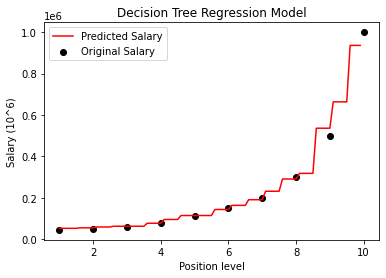

In [ ]:
# here taking x_grid gives us detailed visualisation 
# because we are taking the values with step size 0.1
# from the diagram we can conclude that the graph acts like a step function
x_grid = np.arange(min(x), max(x), 0.1)
x_grid = x_grid.reshape(len(x_grid), 1)
plt.scatter(x, y, color = 'black')
plt.plot(x_grid, RFModel.predict(x_grid), color = 'red')
plt.title("Decision Tree Regression Model")
plt.xlabel("Position level")
plt.legend(['Predicted Salary', "Original Salary"]) 
plt.ylabel("Salary (10^6)")
plt.show()

In [ ]:
# this model is better from decision tree model as it will give valid predictions

#The Code template

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#################################################################

# Importing dataSet
data = pd.read_csv("data.csv")

#################################################################

# Assigning the data
x = data.iloc[:,1:-1].values
y = data.iloc[:,-1].values

#################################################################

# One hot Encoding if required
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
    # shift+tab to see arguments and their importance .... the index '0' is the column which we have to encode
    # in categorical format
    # as we want first column(diagnosis) of the data set to be one hot encoded so we have entered 0
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [0])], remainder = 'passthrough')
    # to update the x value
x = np.array(ct.fit_transform(x))

#################################################################

# Splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.8)

#################################################################

# Creating the model
from sklearn.ensemble import RandomForestRegressor
RFModel = RandomForestRegressor(n_estimators=11)
RFModel.fit(x_train, y_train)
RFModel.score(x_train, y_train)# training accuracy

#################################################################

# Predicting the results
y_pred = RFModel.predict(x_test)
    # to compare the prediceted and actual outputs let us concatenate both of em and print so that it is easy to check ;)
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

#################################################################

# evaluating the performance
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))